In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import math

In [2]:
x, y = np.mgrid[0:16,:16] 
x=x.flatten().astype(float)
y=y.flatten().astype(float)
z=np.array([int(x[i]+y[i]+np.random.rand()*4-2<=15) for i in np.arange(len(x))] , dtype=np.float64)
k = np.array([10, -1, -1])
def f(x, k):
    x = np.hstack(([1], x[:-1]))
    return x.T.dot(k)

In [3]:
def gd(funk_to_optimaze, funk, funk_args, funk_koefs, dx=0.01, n=15, alfa = 0.0005):
    grad = np.array([0.]*len(funk_koefs))
    funk_koefs = np.array(funk_koefs, dtype="float64")
    funk_args = np.array(funk_args, dtype=np.float64)
    for m in range(n):
        for i in range(len(funk_koefs)):
            f=funk_to_optimaze(funk, funk_args, funk_koefs)
            koef_and_delta = np.concatenate((funk_koefs[:i], [funk_koefs[i]+dx], funk_koefs[i+1:]))
            grad[i] = (funk_to_optimaze(funk, funk_args, koef_and_delta)-f)/dx
       #     alfa_tmp = alfa
        #while funk_to_optimaze(funk, funk_args, funk_koefs-grad*alfa_tmp)>f:
         #   alfa_tmp /=2
        funk_koefs -= grad*alfa#_tmp
        print(-funk_koefs[0]/funk_koefs[2], -funk_koefs[1]/funk_koefs[2])
    return funk_koefs     

In [4]:
def sigma(z):
    res = 0.0000000001
    try:
        res = 1/(1.0000000001+math.exp(-z))
    finally: 
        return res
        
    
def cost(funk, arg_list, koefs):
    res = 0
    for z in arg_list[-1]:
        for i in np.arange(len(arg_list[0])):
            res += z*math.log(sigma(funk(arg_list[:,i], koefs)))+(1-z)*math.log(1-sigma(funk(arg_list[:,i], koefs)))
    return -res/len(arg_list[0])

In [5]:
def log_regr(f, data_list, koefs):
    koefs = gd(cost, f, data_list, koefs)
    print(koefs)
    def funk(coord):
        return f(coord, koefs)
    return funk, koefs

In [6]:
funk, koefs = log_regr(f, np.vstack((x, y, z)), k)

15.8495068027 -1.0
18.8322534782 -1.0
16.8037703288 -1.0
18.2421822071 -1.0
17.2198961228 -1.0
17.955807954 -1.0
17.4246363912 -1.0
17.8103246268 -1.0
17.5290947973 -1.0
17.7347312239 -1.0
17.5834215878 -1.0
17.6947470039 -0.999999999999
17.6120651809 -1.0
17.6732143669 -0.999999999998
17.6273223633 -0.999999999998
[ 9.77974671 -0.55480614 -0.55480614]


17.6273223633 -0.999999999998


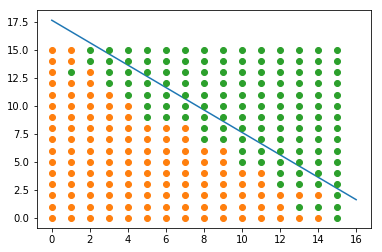

In [7]:
#res_funk = lambda x: -koefs[0]/koefs[3]-koefs[1]/koefs[3]*x-koefs[2]/koefs[3]*x**2
print(-koefs[0]/koefs[2],-koefs[1]/koefs[2])
res_funk = lambda x: -koefs[0]/koefs[2]-koefs[1]/koefs[2]*x
x_pic = np.linspace(0, 16,100)
y_pic = list(map(res_funk, x_pic))             
plt.plot(x_pic, y_pic)
xy1 = np.array([(x[i], y[i]) for i in  np.arange(len(x)) if z[i]==1])
xy2 = np.array([(x[i], y[i]) for i in  np.arange(len(x)) if z[i]==0])
plt.plot(xy1[:, 0],xy1[:,1],  'o')
plt.plot(xy2[:, 0],xy2[:,1],  'o')

In [8]:
i = 0
coord = np.vstack((x, y, z))[:,i]
print(coord)
sigma(funk(coord))

[ 0.  0.  1.]


0.9999434169749131